In [60]:
from six.moves import urllib
from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
print("Success!")

Success!


In [61]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [62]:
X,y=mnist['data'],mnist['target']

In [63]:
X.shape

(70000, 784)

In [64]:
y.shape

(70000,)

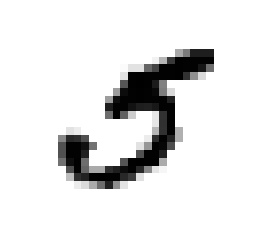

In [65]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,
          interpolation='nearest')
plt.axis('off')
plt.show()

In [66]:
y[36000]

5.0

In [67]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [68]:
import numpy as np

shuffled_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffled_index],y_train[shuffled_index]

In [69]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [70]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [71]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [72]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.9686
0.968
0.9626


In [73]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([ 0.9686,  0.968 ,  0.9626])

In [74]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)


In [75]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([ 0.90815,  0.9124 ,  0.9084 ])

In [76]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[54061,   518],
       [ 1498,  3923]])

In [80]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.88335960369286193

In [81]:
recall_score(y_train_5,y_train_pred)

0.72366722007009776

In [82]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.79557899006286759

In [84]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([ 17885.6631296])

In [85]:
threshold=0

In [87]:
y_some_digit_pred=(y_scores>threshold)

In [88]:
threshold=200000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False], dtype=bool)

In [89]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')

In [91]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

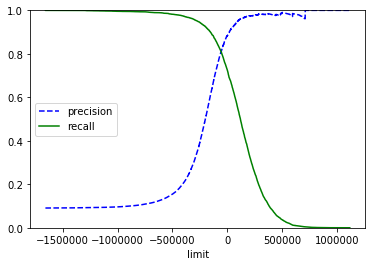

In [94]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='recall')
    plt.xlabel('limit')
    plt.legend(loc='center left')
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

(0, 1)

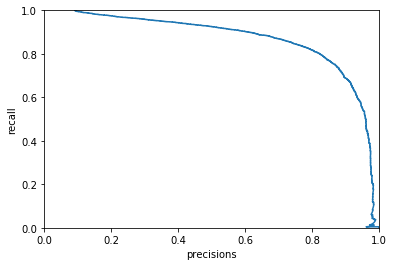

In [95]:
plt.plot(precisions,recalls)
plt.xlabel('precisions')
plt.ylabel('recall')
plt.xlim([0,1])
plt.ylim([0,1])

In [102]:
y_train_pred_90=(y_scores>20000)

In [103]:
precision_score(y_train_5,y_train_pred_90)

0.90313182811361981

In [104]:
recall_score(y_train_5,y_train_pred_90)

0.68622025456557834

In [106]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

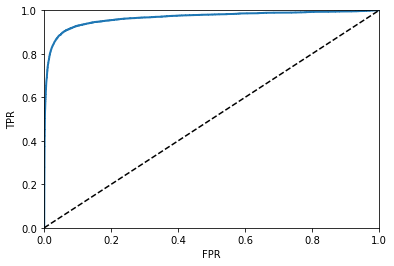

In [109]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
plot_roc_curve(fpr,tpr)
plt.show()

In [110]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.96601892639937159

In [111]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3,
                                 method='predict_proba')

In [112]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

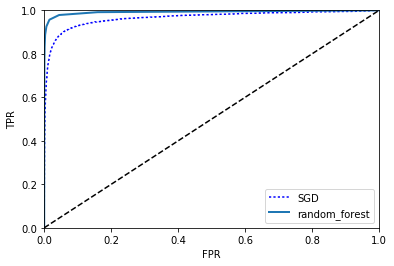

In [113]:
plt.plot(fpr,tpr,'b:',label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,'random_forest')
plt.legend(loc='lower right')
plt.show()

In [114]:
roc_auc_score(y_train_5,y_scores_forest)

0.99239850093803339

In [115]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [116]:
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-229245.31968808, -332367.46855651, -231689.03380369,
        -117468.03715728, -210333.03202673,   17885.6631296 ,
        -716471.96953731, -387165.44188858, -595301.8621941 ,
        -767691.68542165]])

In [117]:
np.argmax(some_digit_scores)

5

In [118]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [119]:
sgd_clf.classes_[5]

5.0

In [125]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(n_iter=5,random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([ 3.])

In [126]:
len(ovo_clf.estimators_)

45

In [127]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [128]:
forest_clf.predict_proba([some_digit])

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [130]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([ 0.87422515,  0.87839392,  0.806671  ])

In [131]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

array([ 0.90696861,  0.91119556,  0.90973646])

In [133]:
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5721,    4,   21,   11,   11,   58,   45,    8,   38,    6],
       [   1, 6446,   46,   27,    6,   47,    6,   10,  140,   13],
       [  61,   43, 5301,  104,   74,   21,  109,   59,  169,   17],
       [  46,   40,  125, 5327,    1,  251,   34,   66,  139,  102],
       [  20,   28,   34,    8, 5387,    9,   53,   29,   74,  200],
       [  72,   44,   33,  176,   73, 4620,  106,   29,  176,   92],
       [  30,   24,   46,    2,   42,   97, 5627,    3,   46,    1],
       [  24,   23,   65,   23,   59,   11,    8, 5799,   14,  239],
       [  51,  145,   68,  150,   14,  158,   57,   25, 5033,  150],
       [  42,   34,   27,   83,  155,   40,    3,  195,   73, 5297]])

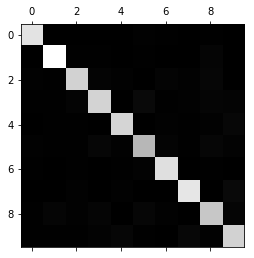

In [134]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [135]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

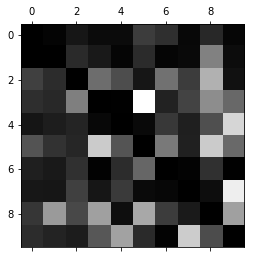

In [136]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

In [137]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [138]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [ ]:
y_train_knn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,n_jobs=-1)
f1_score(y_multilabel,y_train_knn_pred,average='macro')

In [ ]:
noise=rnd.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=rnd.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test